# Importing Libraries

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading and Understanding Dataset

In [3]:
#mounting the Drive with colab
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [4]:
# reading the dataset
df = pd.read_csv(r'/content/drive/MyDrive/C-DAC ACTS/PML/Leads/Leads.csv') 
df.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Understanding Data

In [5]:
df.shape

(9240, 37)

Observation:
In the dataset we have 9240 rows and 37 columns.

In [6]:
#Making a copy of dataframe in order to restore it incase of an emergency
df_copy = df.copy()

In [7]:
#getting the information of data
df.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Observation :

Null values are present in the dataset
Data type of columns are object integer and float

In [8]:
#Getting statistical information about the data
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [9]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
# Conversion Rate for past orders
round(len(df[df['Converted']==1].index)/len(df.index)*100,2)

38.54

In [11]:
df.duplicated().sum()

0

Observation: 

There are no duplicate values present

In [12]:
#Finding the Null Value percentage
def null_values(df):
    return round((df.isnull().sum()*100/len(df)).sort_values(ascending = False),2)
null_values(df)  

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

Observation: Prospect ID & Lead Number are two variables that are just indicative of the ID number of the Contacted People & can be dropped.

In [13]:
df.drop(['Prospect ID','Lead Number'], axis=1, inplace = True)

In [14]:
df.shape

(9240, 35)

In [15]:
# Selecting  all the  non-numeric columns 
df_obj = df.select_dtypes(include='object')

In [16]:
# Finding out the  columns that have "Select" as a value in it
select_func = lambda x: x.str.contains('Select', na=False)
cols_select = df_obj.columns[df_obj.apply(select_func).any()].tolist()
print (cols_select)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


There are the Columns that contains 'select' as there values.

In [17]:
# As we can observe that there are select values for many column.
#This is because customer did not select any option from the list, hence it shows select.
# Select values are as good as NULL.

# Converting 'Select' values to NaN.
df= df.replace('Select', np.nan)

In [19]:
df.head(5)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#Missing Value Handling

In [20]:
df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [21]:
#Getting Null Value Percentage
def null_values(df):
    return round((df.isnull().sum()*100/len(df)).sort_values(ascending = False),2)
null_values(df)  

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Get updates on DM Content                         0.00
Update me 

In [22]:
# we will drop the columns having more than 40% NA values.
df = df.drop(df.loc[:,list(round(100*(df.isnull().sum()/len(df.index)), 2)>40)].columns, 1)

<ipython-input-22-5367c25a6e2c>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(df.loc[:,list(round(100*(df.isnull().sum()/len(df.index)), 2)>40)].columns, 1)


In [23]:
null_values(df)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
Update me on Supply Chain Content                 0.00
Lead Origin                                       0.00
Digital Advertisement                             0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Magazine  

In [24]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [31]:
# getting unique values for all object datatype columns
obj_cols = df.select_dtypes(include='object').nunique()
obj_cols

Lead Origin                                       5
Lead Source                                      21
Do Not Email                                      2
Do Not Call                                       2
Last Activity                                    17
Country                                          38
Specialization                                   18
What is your current occupation                   6
What matters most to you in choosing a course     3
Search                                            2
Magazine                                          1
Newspaper Article                                 2
X Education Forums                                2
Newspaper                                         2
Digital Advertisement                             2
Through Recommendations                           2
Receive More Updates About Our Courses            1
Tags                                             26
Update me on Supply Chain Content                 1
Get updates 

In [40]:
df['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [41]:
# Encoding the variables with yes/no labels
for feature in ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper'
            ,'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses'
            ,'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'
           ,'A free copy of Mastering The Interview']:

    df[feature] = df[feature].apply(lambda x : 1 if x=='Yes' else 0)
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,...,0,0,0,Interested in other courses,0,0,NaN,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,...,0,0,0,Ringing,0,0,NaN,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,...,0,0,0,Will revert after reading the email,0,0,Mumbai,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,...,0,0,0,Ringing,0,0,Mumbai,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,...,0,0,0,Will revert after reading the email,0,0,Mumbai,0,0,Modified


In [42]:
null_values(df)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
Update me on Supply Chain Content                 0.00
Lead Origin                                       0.00
Digital Advertisement                             0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Magazine  

In [43]:
df.shape

(9240, 28)

In [44]:
# Listing the categorical variables yet to be encoded
df.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Lead Origin                                    9240 non-null   object
 1   Lead Source                                    9204 non-null   object
 2   Last Activity                                  9137 non-null   object
 3   Country                                        6779 non-null   object
 4   Specialization                                 5860 non-null   object
 5   What is your current occupation                6550 non-null   object
 6   What matters most to you in choosing a course  6531 non-null   object
 7   Tags                                           5887 non-null   object
 8   City                                           5571 non-null   object
 9   Last Notable Activity                          9240 non-null   

In [45]:
# Checking the labels of the remaining categorical columns

for i in df.iloc[:,1:].select_dtypes(include='object').columns:
    print(i)
    print("--------------------------------------------------------------------------------")
    print(df[i].value_counts(normalize= True))
    print("_________________________________________________________________________________________________")

Lead Source
--------------------------------------------------------------------------------
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
testone              0.000109
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
WeLearn              0.000109
blog                 0.000109
NC_EDM               0.000109
Name: Lead Source, dtype: float64
_________________________________________________________________________________________________
Last Activity
--------------------------------------------------------------------------------
Email Opened                    0.376163
SMS Sent 

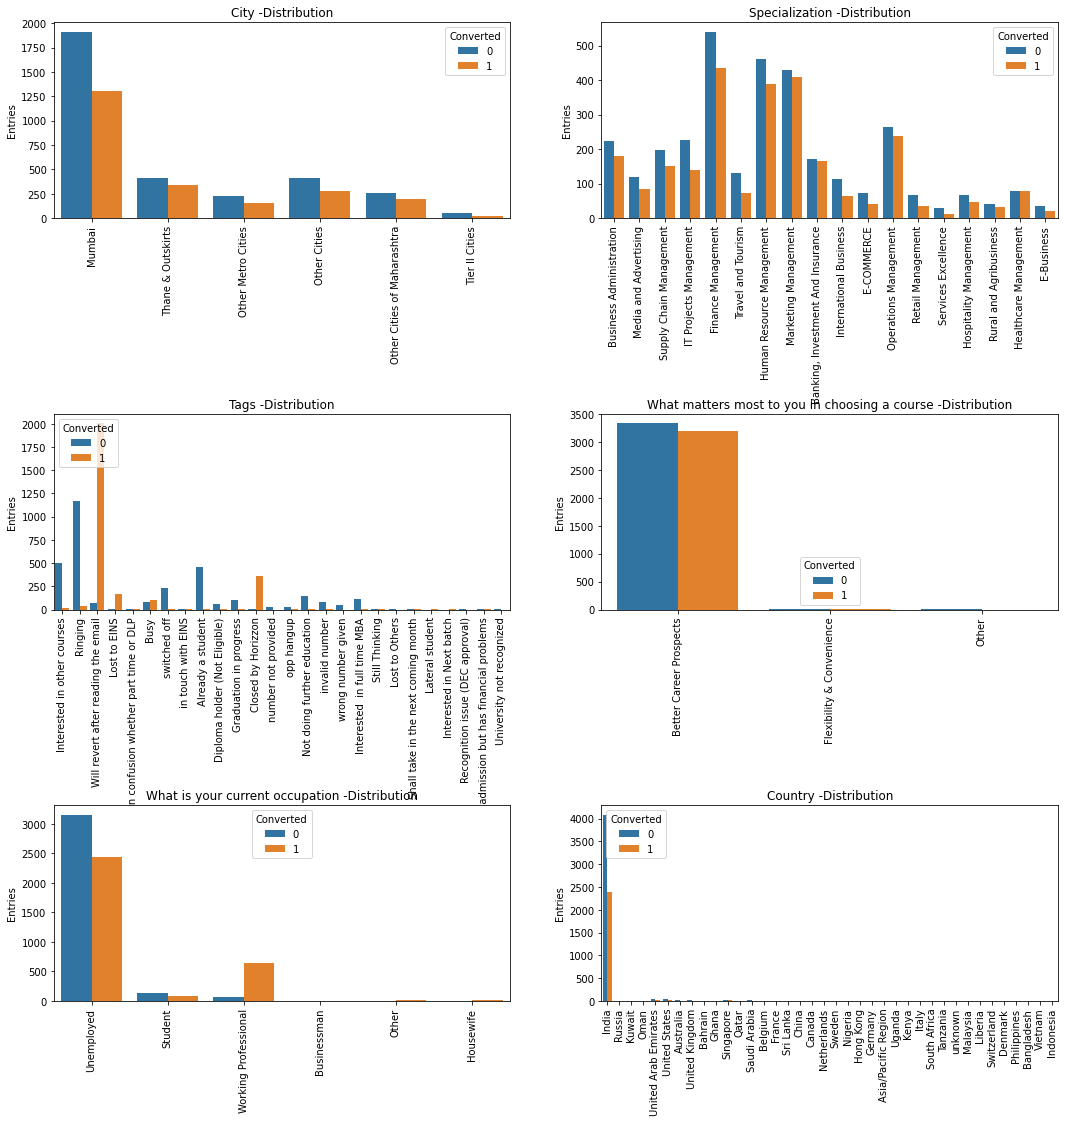

In [46]:
col_listforcount2 = ['City','Specialization','Tags','What matters most to you in choosing a course','What is your current occupation','Country']

plt.figure(figsize=(18,18))
for i in range(len(col_listforcount2)):
    plt.subplot(3,2,i+1)
    var=col_listforcount2[i]
    sns.countplot(x=var,hue='Converted',data=df)
    plt.title('Plotting data of count in terms of target')
    plt.title(var+' -Distribution')
    plt.xticks(rotation=90)
    plt.ylabel('Entries')
    plt.xlabel(None)
    plt.subplots_adjust(hspace=1)

In [47]:
# We can impute the MUMBAI into all the NULLs as most of the values belong to MUMBAI
df['City'] = df['City'].replace(np.nan, 'Mumbai')

# Since there is no significant difference among top 3 specialisation , hence it will be safer to impute NaN with Others
df['Specialization'] = df['Specialization'].replace(np.nan, 'Other_Specialization')

# For Tags column, more than 30% data is for "Will revert after reading the email" and hence we can impute NULLS with Will revert after reading the email
df['Tags'] = df['Tags'].replace(np.nan, 'Will revert after reading the email')

# More than 99% data is of "Better Career Prospects" and hence it is safer to impute NULLS with this value
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

# More than 85% data is of "Unemployed" and hence it is safer to impute NULLS with this value
df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

# More than 95% data is of "India" and hence it is safer to impute NULLS with this value
df['Country'] = df['Country'].replace(np.nan, 'India')

In [48]:
null_values(df)

TotalVisits                                      1.48
Page Views Per Visit                             1.48
Last Activity                                    1.11
Lead Source                                      0.39
Lead Origin                                      0.00
X Education Forums                               0.00
A free copy of Mastering The Interview           0.00
I agree to pay the amount through cheque         0.00
City                                             0.00
Get updates on DM Content                        0.00
Update me on Supply Chain Content                0.00
Tags                                             0.00
Receive More Updates About Our Courses           0.00
Through Recommendations                          0.00
Digital Advertisement                            0.00
Newspaper                                        0.00
Magazine                                         0.00
Newspaper Article                                0.00
Search                      

In [52]:
# Remaining NULL values are less than 2% and hence these rows can be directly dropped
# df.dropna(inplace=True)

df = df.drop(df.loc[:,list(round(100*(df.isnull().sum()/len(df.index)), 2)>0)].columns, 1)
df.head()

<ipython-input-52-2070510f3e0b>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(df.loc[:,list(round(100*(df.isnull().sum()/len(df.index)), 2)>0)].columns, 1)


,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,...,0,0,0,Interested in other courses,0,0,Mumbai,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,...,0,0,0,Ringing,0,0,Mumbai,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,...,0,0,0,Will revert after reading the email,0,0,Mumbai,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,...,0,0,0,Ringing,0,0,Mumbai,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,...,0,0,0,Will revert after reading the email,0,0,Mumbai,0,0,Modified


In [53]:
df.shape

(9074, 28)

In [54]:
null_values(df)

Lead Origin                                      0.0
Lead Source                                      0.0
A free copy of Mastering The Interview           0.0
I agree to pay the amount through cheque         0.0
City                                             0.0
Get updates on DM Content                        0.0
Update me on Supply Chain Content                0.0
Tags                                             0.0
Receive More Updates About Our Courses           0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Magazine                                         0.0
Search                                           0.0
What matters most to you in choosing a course    0.0
What is your current occupation                  0.0
Specialization                                

Now the data is completely free of null values

Working with Categorical data

In [57]:
# Listing the categorical variables yet to be encoded
df.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Lead Origin                                    9074 non-null   object
 1   Lead Source                                    9074 non-null   object
 2   Last Activity                                  9074 non-null   object
 3   Country                                        9074 non-null   object
 4   Specialization                                 9074 non-null   object
 5   What is your current occupation                9074 non-null   object
 6   What matters most to you in choosing a course  9074 non-null   object
 7   Tags                                           9074 non-null   object
 8   City                                           9074 non-null   object
 9   Last Notable Activity                          9074 non-null   

**Target variable : Converted**

In [55]:
# Lets start with the target variable and see if we have any data imbalance or not 
df['Converted'].value_counts()

0    5639
1    3435
Name: Converted, dtype: int64

In [56]:
df['Converted'].value_counts(normalize=True)

0    0.621446
1    0.378554
Name: Converted, dtype: float64

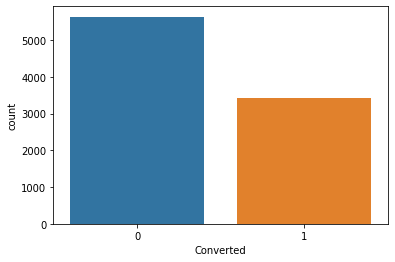

In [58]:
# Count plot
sns.countplot(x='Converted', data=df)

We have fair amount of data in both the classes. so we can go for the further analysis

**Lead Source and Lead origin**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text major ticklabel objects>)

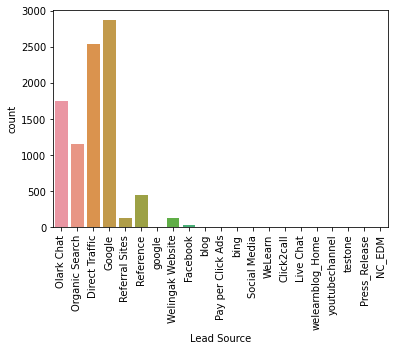

In [59]:
# Count plot of the Lead source
sns.countplot(x='Lead Source', data=df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

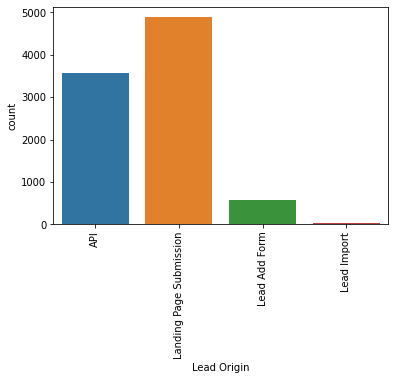

In [60]:
# Count plot of the Lead Origin
sns.countplot(x='Lead Origin', data=df)
plt.xticks(rotation=90)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


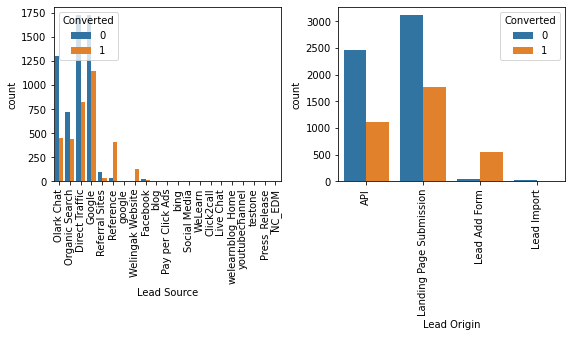

In [62]:
# Bivariate analysis with respect to target variable "converted"

fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['Lead Source', 'Lead Origin']):
    plt.subplot(3, 3, i+1)
    plt.subplots_adjust()
    sns.countplot(df[feature], hue=df["Converted"])
    plt.xticks(rotation=90)
    plt.tight_layout()

**Obvservation**

1. API and Landing Page Submission has less conversion rate(~30%) but counts of the leads from them are considerable
2. The count of leads from the Lead Add Form is pretty low but the conversion rate is very high
3. Lead Import has very less count as well as conversion rate and hence can be ignored

In [63]:
# We can clearly observe that the count of leads from various sources are close to negligible and hence we can club them into "Others" source for better visualisation and analysis

df['Lead Source'] = df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Other_Lead_Source')

df['Lead Source'] = df['Lead Source'].replace("google", 'Google')

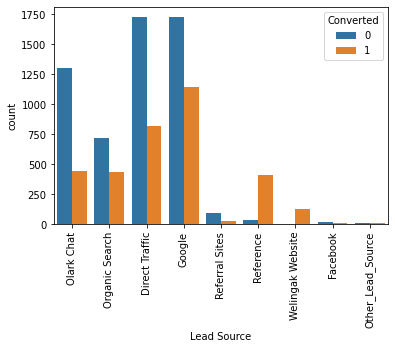

In [64]:
# Plotting Lead Source again

sns.countplot(x="Lead Source", hue="Converted", data= df)
plt.xticks(rotation='vertical')
plt.show()

**OBSERVATION:**

The count of leads from the Google and Direct Traffic is maximum
The conversion rate of the leads from Reference and Welingak Website is maximum

Last Activity

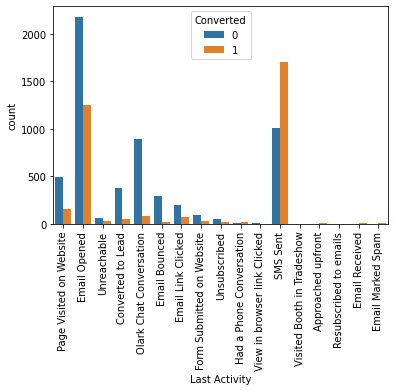

In [65]:
# Plotting the Last Activity with respect to target

sns.countplot(x="Last Activity", hue="Converted", data= df)
plt.xticks(rotation='vertical')
plt.show()

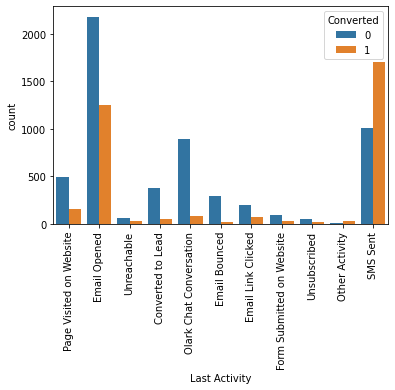

In [66]:
# Converting all the low count categories to the 'Others' category since they are negligible
df['Last Activity'] = df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other Activity')

# lets plot the Last Activity again 
sns.countplot(x="Last Activity", hue="Converted", data= df)
plt.xticks( rotation='vertical')
plt.show()

**OBSERVATION:**

The count of lst activity as "Email Opened" is max
The conversion rate of SMS sent as last activity is maximum

**"Specialization" and "What is your current occupation"**

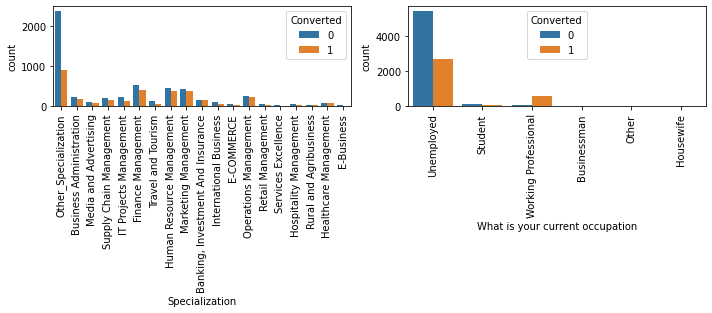

In [67]:
fig=plt.subplots(figsize=(10, 6))

for i, feature in enumerate(["Specialization", "What is your current occupation"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.countplot(x=feature, hue="Converted", data=df)
    plt.xticks( rotation='vertical')
    plt.tight_layout()


**OBSERVATION:**

Looking at above plot, no particular inference can be made for Specialization
Looking at above plot, we can say that working professionals have high conversion rate
Number of Unemployed leads are more than any other category

In [68]:
df['What is your current occupation'] = df['What is your current occupation'].replace("Other", 'Other_Occupation')

In [69]:
df[["Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement",
         "Through Recommendations","Update me on Supply Chain Content","Get updates on DM Content"
         ,"I agree to pay the amount through cheque","A free copy of Mastering The Interview"]].describe()

,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,9074.000000,9074.0,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.0,9074.0,9074.0,9074.000000
mean,0.001543,0.0,0.000220,0.000110,0.000110,0.000441,0.000771,0.0,0.0,0.0,0.318272
std,0.039251,0.0,0.014845,0.010498,0.010498,0.020992,0.027766,0.0,0.0,0.0,0.465831
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000


**OBSERVATION:**

We can clearly see that most values in the all the columns are 0 i.e. "No" and hence no inference can be made using these columns

In [70]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

**Tags**

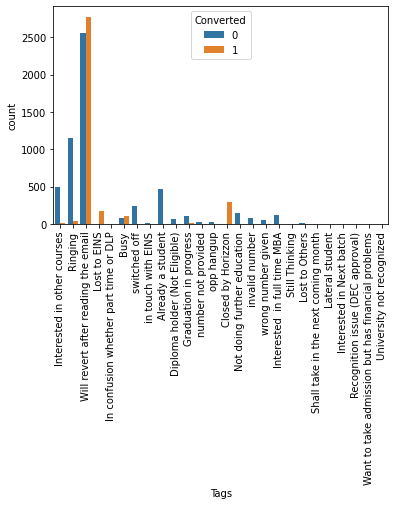

In [72]:
# lets plot the Tags 
sns.countplot(x="Tags", hue="Converted", data= df)
plt.xticks( rotation='vertical')
plt.show()

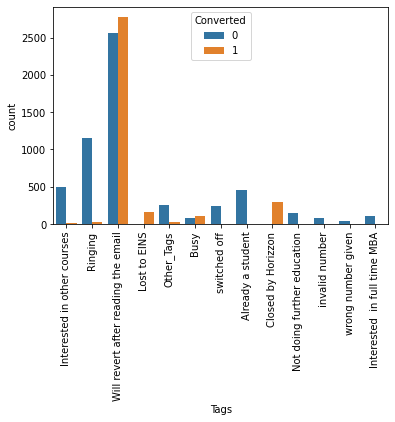

In [73]:
# Converting all low count categories to Others category
df['Tags'] = df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

# lets plot the Tags again
sns.countplot(x="Tags", hue="Converted", data= df)
plt.xticks( rotation='vertical')
plt.show()

OBSERVATION:

'Will revert after reading the email' and 'Closed by Horizzon' have high conversion rate

SUMMARY:
To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'API' and 'Landing Page Submission' Lead Origins and also increasing the number of leads from 'Lead Add Form'

To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'Google', 'Olark Chat', 'Organic Search', 'Direct Traffic' and also increasing the number of leads from 'Reference' and 'Welingak Website'

Websites can be made more appealing so as to increase the time of the Users on websites

We should focus on increasing the conversion rate of those having last activity as Email Opened by making a call to those leads and also try to increase the count of the ones having last activity as SMS sent

To increase overall conversion rate, we need to increase the number of Working Professional leads by reaching out to them through different social sites such as LinkedIn etc. and also on increasing the conversion rate of Unemployed leads

We also observed that there are multiple columns which contains data of a single value only. As these columns do not contribute towards any inference, we can remove them from further analysis

In [74]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [76]:
# Dropping unnecessary columns

df = df.drop(['What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country','Do Not Call'],1)

df.head()

<ipython-input-76-d8c39a7b2fa6>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(['What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',


,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,Interested in other courses,Mumbai,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,Ringing,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,Unemployed,Will revert after reading the email,Mumbai,Modified


In [77]:
df.shape

(9074, 13)

In [78]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,Interested in other courses,Mumbai,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,Ringing,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,Unemployed,Will revert after reading the email,Mumbai,Modified


In [86]:
df['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

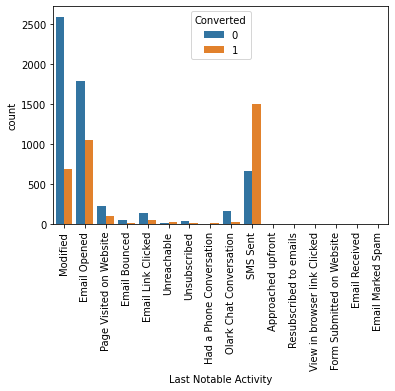

In [87]:
sns.countplot(x="Last Notable Activity", hue="Converted", data= df)
plt.xticks( rotation='vertical')
plt.show()

In [79]:
new_data = df.copy()

## Dummy Columns 

In [88]:
dummy = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','City','Last Notable Activity']], drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [90]:
df = df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','City','Last Notable Activity'], axis=1)
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0,0,0.0,0,0.0
1,0,0,5.0,674,2.5
2,0,1,2.0,1532,2.0
3,0,0,1.0,305,1.0
4,0,1,2.0,1428,1.0


In [92]:
df = pd.concat([df, dummy], axis=1)
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [93]:
df.shape

(9074, 81)

Checking for Outliers at various level

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


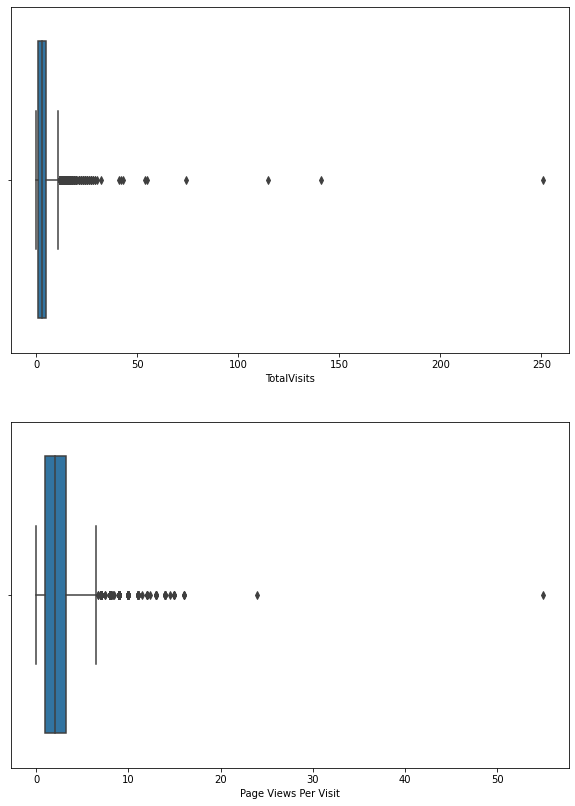

In [97]:
plt.figure(figsize = (10, 14))

plt.subplot(2,1,1)
sns.boxplot(df.TotalVisits)

plt.subplot(2,1,2)
sns.boxplot(df['Page Views Per Visit'])
plt.show()


## Test-Train Split

In [100]:
# Putting feature variable to X
X = df.drop(['Converted'], axis=1)
y = df['Converted']

In [101]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [102]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

## Model Building

In [103]:
#Logistic Model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=1)
model = classifier.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [104]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 1])

In [105]:
#confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm

array([[1099,   88],
       [  91,  537]])

In [106]:
accuracy_score(y_test, y_pred)

0.9013774104683195

In [ ]:
df_test = pd.DataFrame(y_test.copy(), columns=['Actual'])

In [110]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1187
           1       0.86      0.86      0.86       628

    accuracy                           0.90      1815
   macro avg       0.89      0.89      0.89      1815
weighted avg       0.90      0.90      0.90      1815



# Conclusion

1. Here we build the Logistic Regression Model with 90.13% accuracy.
2. Number of Unemployed people were more
3. Maximum Indians were present
4. Maximum no. of people were from Mumbai
5. In lead origin, there are 3 categories API, page submission, lead add form has more lead conversion rate. And among these, 'lead add form' has most conversion rate.
6. Those people who has last activity as SMS sent has most lead conversion rate.
7. Maximum lead_source was from Google and organic search and direct traffic. But, those people who comes with references and welingak_website has higher possibilities of converting into hot leads.
